## ALGORITMOS DE APRENDIZAJE NO SUPERVISADO

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.gexpress as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Paso 1: Cargar y analizar el dataset
data = pd.read_csv("Mall_Customers.csv")

# Inspeccionar el dataset
print(data.info())
print(data.describe())
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

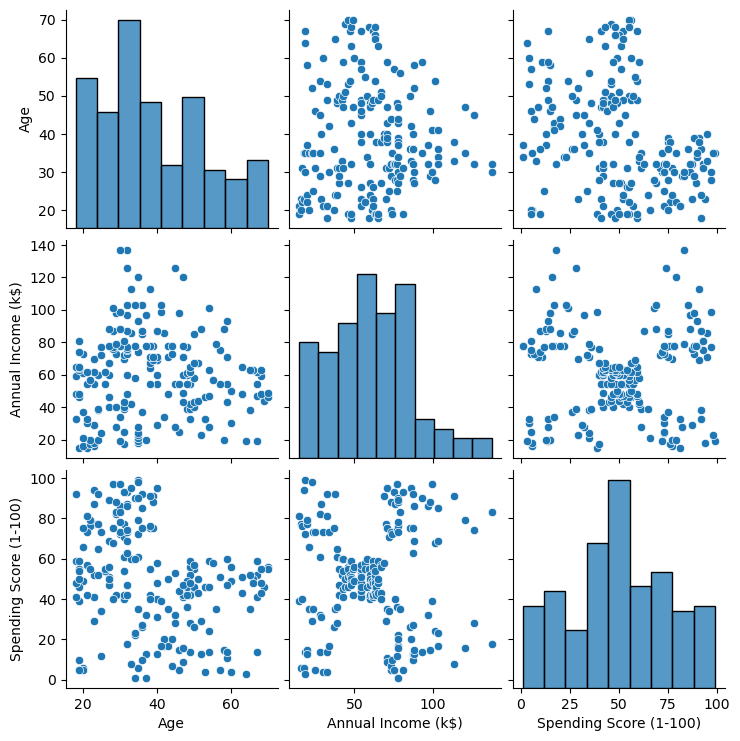

In [16]:
# Visualización inicial de las variables para análisis exploratorio
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

<Axes: >

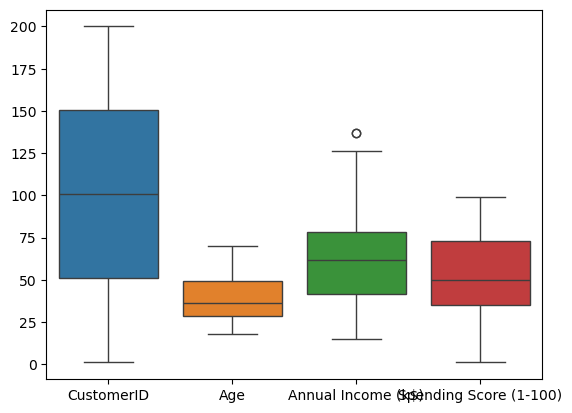

In [18]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [200]:
# Paso 2: Preprocesamiento de datos
# Verificar valores nulos y limpiar si es necesario
print("Valores nulos en el dataset:\n", data.isnull().sum())

Valores nulos en el dataset:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Identificación de datos atípicos')

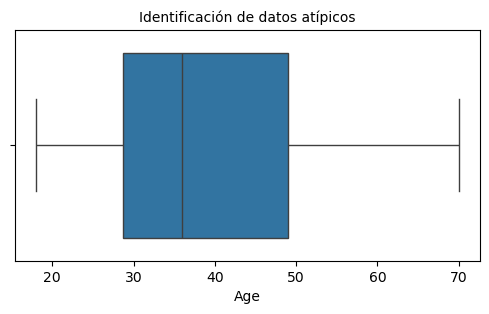

In [202]:
# Identificación de datos atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de datos atípicos', fontsize=10)

In [204]:
# Identificar datos atípicos en la columna 'Age' con un rango mínimo de 18 y máximo de 70
outliers_age = data[(data['Age'] < 18) | (data['Age'] > 70)]

# Contar el número de datos atípicos
num_outliers_age = outliers_age.shape[0]
print(f"Número de datos atípicos en la columna 'Age': {num_outliers_age}")


Número de datos atípicos en la columna 'Age': 0


Text(0.5, 1.0, 'Identificación de datos atípicos')

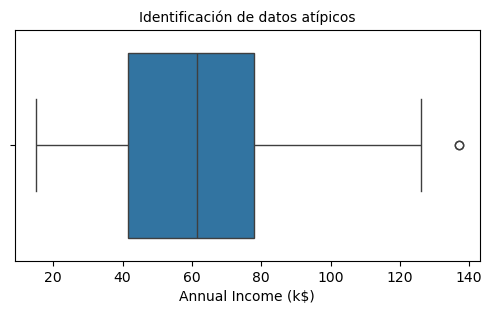

In [206]:
# Identificación de datos atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de datos atípicos', fontsize=10)

In [226]:
# Identificar datos atípicos en la columna 'Annual Income (k$)' con un rango mínimo de 10 y máximo de 140
outliers_income = data[(data['Annual Income (k$)'] < 10) | (data['Annual Income (k$)'] > 140)]

# Contar el número de datos atípicos
num_outliers_income = outliers_age.shape[0]
print(f"Número de datos atípicos en la columna 'Annual Income (k$)': {num_outliers_income}")

Número de datos atípicos en la columna 'Annual Income (k$)': 0


In [228]:
# Filtrar los datos atípicos en la columna 'Annual Income (k$)'
outliers_income = data[(data['Annual Income (k$)'] < 10) | (data['Annual Income (k$)'] > 140)]

# Mostrar los datos atípicos
outliers_income

,Gender,Age,Annual Income (k$),Spending Score (1-100)


Text(0.5, 1.0, 'Identificación de datos atípicos')

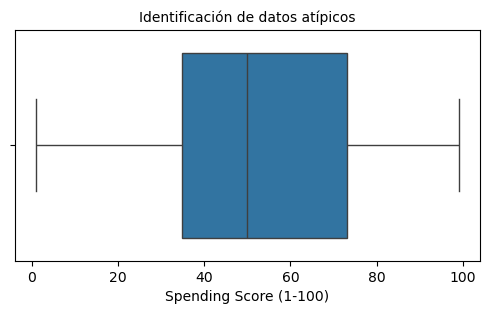

In [224]:
# Identificación de datos atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de datos atípicos', fontsize=10)

In [230]:
# Identificar datos atípicos en la columna 'Spending Score (1-100)' con un rango mínimo de 1 y máximo de 100
outliers_score = data[(data['Spending Score (1-100)'] < 1) | (data['Spending Score (1-100)'] > 100)]

# Contar el número de datos atípicos
num_outliers_score = outliers_age.shape[0]
print(f"Número de datos atípicos en la columna 'Spending Score (1-100)': {num_outliers_score}")

Número de datos atípicos en la columna 'Spending Score (1-100)': 0


# SELECCIONAR LAS CARACTERISTICAS MAS RELEVANTES

In [237]:
# Paso 3: Selección de características
X =data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


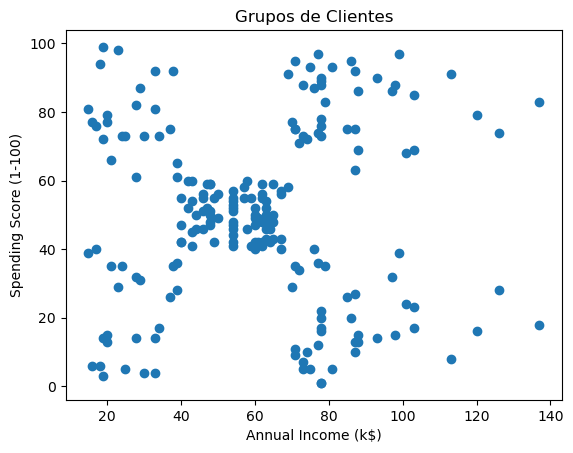

In [239]:
# Visualización inicial de las variables antes del agrupamiento
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

## K-MEANS

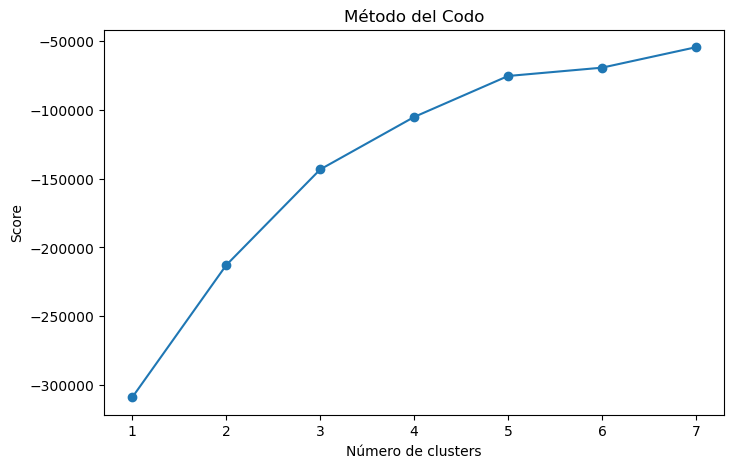

In [383]:
# Paso 4: Entrenar el modelo de K-means
# Usamos el método del codo para encontrar el número óptimo de clusters

k_range = range(1, 8)
kmeans = [KMeans(n_clusters=k) for k in k_range]
kmeans 
score = [kmeans[k].fit(X).score(X) for k in range(len(kmeans))]
score

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, score, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.show()



In [399]:
# Basándonos en el método del codo, elegimos un modelo óptimo de clusters (para el caso, k=6)
k_opt = 5
Modelo = KMeans(n_clusters=k_opt, random_state=0)
Modelo.fit(X)

KMeans(n_clusters=5, random_state=0)

In [401]:
# Se agrega la columna grupo a la BD para identificar el numero de grupo
Modelo.labels_
X["Grupo"]=Modelo.labels_
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [407]:
kmeans = KMeans(n_clusters=k_opt).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[4.39342105e+01, 5.52105263e+01, 4.94473684e+01, 2.26315789e+00],
       [3.26923077e+01, 8.65384615e+01, 8.21282051e+01, 1.00000000e+00],
       [4.03243243e+01, 8.74324324e+01, 1.81891892e+01, 3.08108108e+00],
       [2.49600000e+01, 2.80400000e+01, 7.70000000e+01, 2.16000000e+00],
       [4.52173913e+01, 2.63043478e+01, 2.09130435e+01, 8.69565217e-02]])

In [409]:
# Paso 5: Evaluación del modelo
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhouette: 0.43915642167236996
Índice de Calinski-Harabasz: 150.15344419981437


In [411]:
#labels = kmeans.labels_
# Obtenemos los centroides
C = kmeans.cluster_centers_

# Asignar colores a los clusters
colores = ['red', 'green', 'cyan', 'blue', 'grey']
asignar = []
for row in labels:
    asignar.append(colores[row])

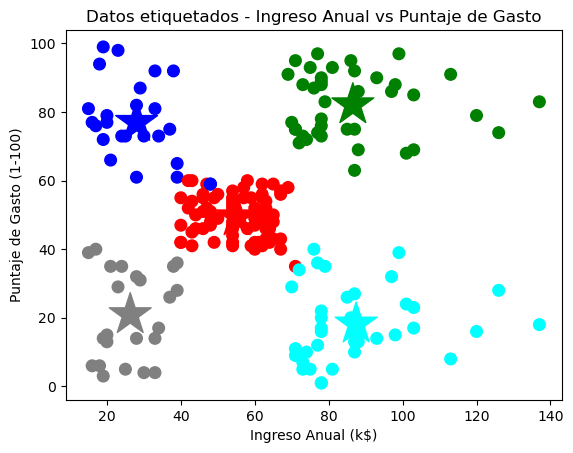

In [417]:
# Paso 6: Visualización de los resultados
# Usaremos dos características para la visualización
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados - Ingreso Anual vs Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

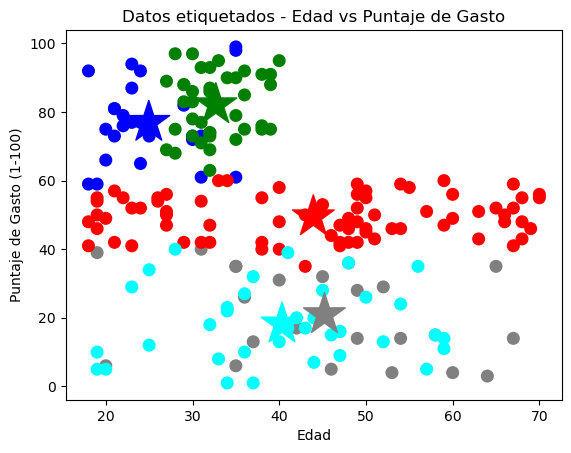

In [419]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados - Edad vs Puntaje de Gasto')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

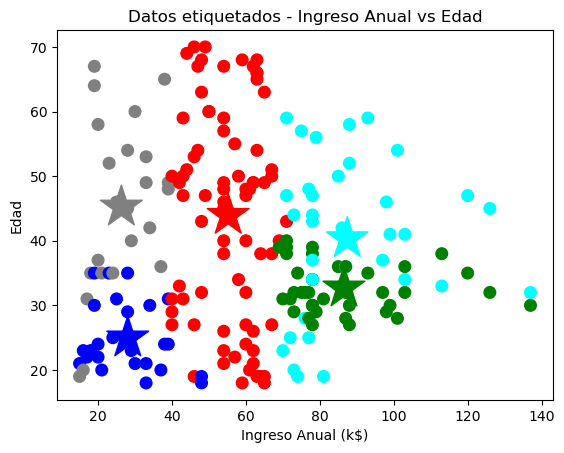

In [421]:
f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 0], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados - Ingreso Anual vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.show()

In [429]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.43915642167236996
Índice de Calinski-Harabasz: 150.15344419981437
Davies-Bouldin Index: 0.8295834125584077


# Paso 7: Interpretación y análisis de resultados
# Observamos las características promedio de cada cluster para interpretar los perfiles de clientes
Interpretación de los Clusters
A continuación, se presenta una interpretación de cada uno de los clusters obtenidos:

•	Cluster 0 (Clientes de bajos ingresos y bajo puntaje de gasto): Los clientes en este cluster tienen ingresos y puntaje de gasto bajos, lo que indica una baja actividad de compra en el centro comercial. Estrategias que ofrezcan incentivos de bajo costo pueden ayudar a aumentar la frecuencia de sus visitas.
•	Cluster 1 (Clientes de ingresos altos y Alto puntaje de gasto): Este grupo incluye a clientes con un ingreso anual elevado pero que tienden a gastar alto. Esto sugiere una tendencia a gastar una porción significativa de sus ingresos en el centro comercial, Debido a su alto nivel de gasto, estos clientes pueden representar una fuente estable y lucrativa de ingresos a largo plazo. Enfocar esfuerzos en la retención y satisfacción de este segmento es fundamental, ya que su pérdida podría impactar significativamente los ingresos.
•	Cluster 2 (Clientes de ingresos altos y Bajo puntaje de gasto): Este grupo incluye a clientes con un ingreso anual elevado pero que tienden a gastar alto. Es probable que estos consumidores sean cautelosos con sus gastos a pesar de tener un alto poder adquisitivo, por lo que estrategias de ofertas o servicios exclusivos podrían incentivar un mayor gasto.
•	Cluster 3 (Clientes de ingresos medios y gasto moderado): Los clientes en este grupo tienen ingresos y puntajes de gasto promedio. Es un segmento estable que podría beneficiarse de incentivos personalizados para aumentar el gasto.
•	Cluster 4 (Clientes de ingresos bajos y puntaje de gasto alto): Este cluster está formado por clientes que, a pesar de tener un ingreso limitado, presentan un puntaje de gasto alto. Esto sugiere una tendencia a gastar una porción significativa de sus ingresos en el centro comercial, lo que puede ser aprovechado mediante promociones de fidelización.
